In [1]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
import seaborn as sns

cmap = sns.color_palette("colorblind")

In [3]:
df_gurobi_TTS = pd.read_csv(
    "../qokit/assets/classical_solvers/gurobi_TTS_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
)
df_gurobi_TTO = pd.read_csv(
    "../qokit/assets/classical_solvers/gurobi_TTO_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
)

TTS: CI (1.438,1.578)
TTO: CI (1.721,1.792)


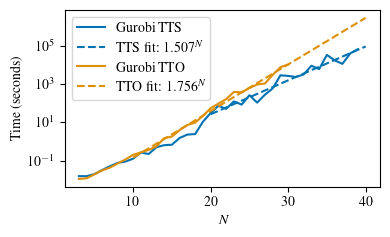

In [4]:
ignore_skew=True # no meaningful impact 
# confidence for CI                 
alpha=0.05

f, ax = plt.subplots(figsize=(4, 2.47213))

for idx, (label, column_name, dftmp, min_n) in enumerate(
    [
        ('TTS', 'TTS_process_time', df_gurobi_TTS, 20), 
        ('TTO', 'process_time', df_gurobi_TTO, 10)]
):
    plt.plot(dftmp['n'].values, dftmp[column_name].values, c=cmap[idx], label=f'Gurobi {label}')
    if ignore_skew:
        dftmp = dftmp[
            (dftmp['n'] >= min_n) & (dftmp['n'] != 17) & (dftmp['n'] != 23) & (dftmp['n'] != 27) & (dftmp['n'] != 29)
        ]
    else:
        dftmp = dftmp[dftmp['n'] >= min_n]

    X = sm.add_constant(dftmp['n'].values)

    mod = sm.OLS(np.log(dftmp[column_name].values), X)
    res = mod.fit()
    
    Ns_pred = np.arange(min_n, 41)
    X_pred = sm.add_constant(Ns_pred)
    pred = res.get_prediction(X_pred)
    CI = np.e**res.conf_int(alpha=alpha)

    plt.plot(Ns_pred, np.e**pred.predicted_mean, c=cmap[idx], linestyle='dashed',
             label=f'{label} fit:  ${np.e**res.params[1]:.3f}^N$')
    print(f"{label}: CI ({CI[1][0]:.3f},{CI[1][1]:.3f})")

plt.legend()
plt.yscale('log')
plt.xlabel(r"$N$")
plt.ylabel("Time (seconds)")
plt.tight_layout()
plt.savefig('figures/gurobi.pdf')

# CPLEX

In [5]:
df_CPLEX = pd.read_json(
    "../qokit/assets/classical_solvers/runtime_CPLEX.json",
    orient='index'
)


TTS: CI (1.493,1.702)
TTO: CI (1.757,1.839)


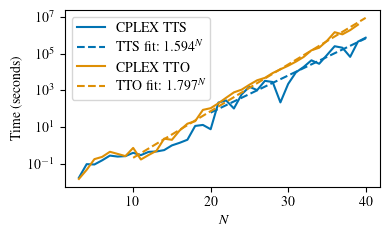

In [6]:
ignore_skew=True # no meaningful impact 
# confidence for CI                 
alpha=0.05

f, ax = plt.subplots(figsize=(4, 2.47213))

for idx, (label, column_name, dftmp, min_n, max_n) in enumerate(
    [
        ('TTS', 'CPLEX_TTS_process_time', df_CPLEX, 20, 40), 
        ('TTO', 'CPLEX_TTO_process_time', df_CPLEX, 10, 39)]
):
    plt.plot(dftmp['n'].values, dftmp[column_name].values, c=cmap[idx], label=f'CPLEX {label}')
    if ignore_skew:
        dftmp = dftmp[
            (dftmp['n'] >= min_n) & (dftmp['n'] <= max_n) & (dftmp['n'] != 17) & (dftmp['n'] != 23) & (dftmp['n'] != 27) & (dftmp['n'] != 29)
        ]
    else:
        dftmp = dftmp[dftmp['n'] >= min_n]

    X = sm.add_constant(dftmp['n'].values)

    mod = sm.OLS(np.log(dftmp[column_name].values), X)
    res = mod.fit()
    
    Ns_pred = np.arange(min_n, 41)
    X_pred = sm.add_constant(Ns_pred)
    pred = res.get_prediction(X_pred)
    CI = np.e**res.conf_int(alpha=alpha)

    plt.plot(Ns_pred, np.e**pred.predicted_mean, c=cmap[idx], linestyle='dashed',
             label=f'{label} fit:  ${np.e**res.params[1]:.3f}^N$')
    print(f"{label}: CI ({CI[1][0]:.3f},{CI[1][1]:.3f})")

plt.legend()
plt.yscale('log')
plt.xlabel(r"$N$")
plt.ylabel("Time (seconds)")
plt.tight_layout()
plt.savefig('figures/CPLEX.pdf')

## Smaller minimum N for reference

In [7]:
ignore_skew=True # no meaningful impact 
# confidence for CI                 
alpha=0.05
    
for idx, (label, column_name, dftmp) in enumerate(
    [
        ('TTS', 'TTS_process_time', df_gurobi_TTS), 
        ('TTO', 'process_time', df_gurobi_TTO)]
):
    for min_n in [10,15,20]:
        if ignore_skew:
            dftmp = dftmp[
                (dftmp['n'] >= min_n) & (dftmp['n'] != 17) & (dftmp['n'] != 23) & (dftmp['n'] != 27) & (dftmp['n'] != 29)
            ]
        else:
            dftmp = dftmp[dftmp['n'] >= min_n]

        X = sm.add_constant(dftmp['n'].values)

        mod = sm.OLS(np.log(dftmp[column_name].values), X)
        res = mod.fit()

        Ns_pred = np.arange(min_n, 41)
        X_pred = sm.add_constant(Ns_pred)
        pred = res.get_prediction(X_pred)
        CI = np.e**res.conf_int(alpha=alpha)

        print(f"{label} fit with N >= {min_n}:  {np.e**res.params[1]:.3f}**N, CI ({CI[1][0]:.3f},{CI[1][1]:.3f})")

TTS fit with N >= 10:  1.590**N, CI (1.549,1.631)
TTS fit with N >= 15:  1.578**N, CI (1.518,1.640)
TTS fit with N >= 20:  1.507**N, CI (1.438,1.578)
TTO fit with N >= 10:  1.756**N, CI (1.721,1.792)
TTO fit with N >= 15:  1.761**N, CI (1.704,1.820)
TTO fit with N >= 20:  1.668**N, CI (1.611,1.728)
